In [264]:
# Group Number – 67
# EG/2020/4112 Perara H.L.D.U.G.
# EG/2020/4146 Ranaweera R.A.P.I.

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Algorithms
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler


In [266]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')

In [267]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [268]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [270]:
# Extract numerical columns for normalization
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply Min-Max scaling to the numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [271]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [272]:
# Map the genders to numerical values
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2}).astype('category')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,1.000000,0,1,never,0.177171,0.563636,0.272727,0
1,1,0.674675,0,0,No Info,0.202031,0.563636,0.000000,0
2,0,0.349349,0,0,never,0.202031,0.400000,0.354545,0
3,1,0.449449,0,0,current,0.156863,0.272727,0.340909,0
4,0,0.949950,1,1,current,0.118231,0.236364,0.340909,0


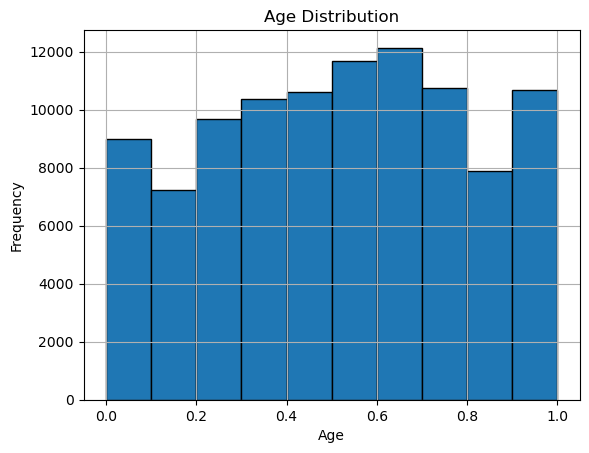

In [273]:
# Plotting histogram for 'age'
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

In [274]:
df['gender'].value_counts()

gender
1    58552
0    41430
2       18
Name: count, dtype: int64

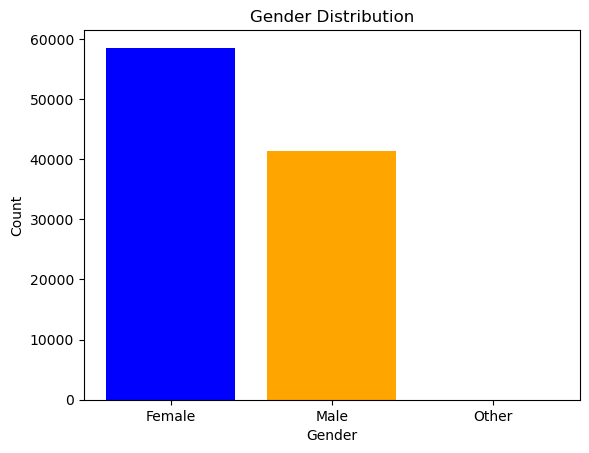

In [275]:
# Extracting data for plotting
genders = ['Female', 'Male', 'Other']
counts = df['gender'].value_counts()

# Plotting the bar graph
plt.bar(genders, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


In [276]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [277]:
df['smoking_history'] = df['smoking_history'].map({'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5}).astype('category')
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,1,1.000000,0,0,0,0.202031,0.490909,0.045455,0
99996,1,0.024024,0,0,0,0.085901,0.545455,0.090909,0
99997,0,0.824825,0,0,2,0.207983,0.400000,0.340909,0
99998,1,0.299299,0,0,1,0.296569,0.090909,0.090909,0
99999,1,0.712212,0,0,3,0.144958,0.563636,0.045455,0


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  category
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   smoking_history      100000 non-null  category
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  float64 
 8   diabetes             100000 non-null  int64   
dtypes: category(2), float64(4), int64(3)
memory usage: 5.5 MB


c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


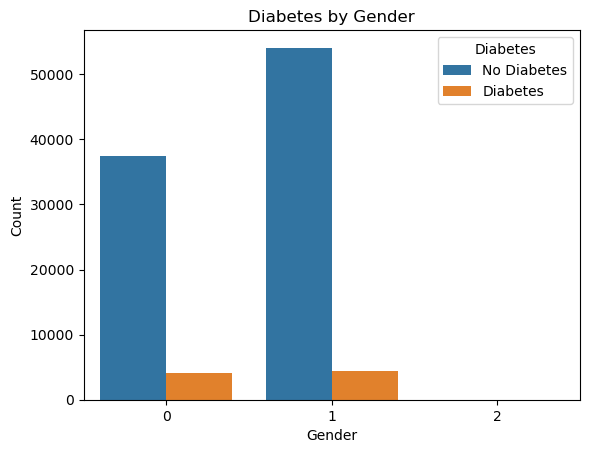

In [279]:
# Plotting a count plot

# fix Seaborn count plot error that there's a problem with the data type or format of the 'diabetes' column
df['diabetes'] = df['diabetes'].astype(str)

sns.countplot(x='gender', hue='diabetes', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Diabetes by Gender')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  category
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   smoking_history      100000 non-null  category
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  float64 
 8   diabetes             100000 non-null  object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 5.5+ MB


In [281]:
from sklearn.model_selection import train_test_split

In [282]:
y = df['diabetes']
x = df.drop(['diabetes'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [283]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [284]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [285]:
y_pred = model.predict(x_test)

In [286]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print(score)

0.9601


In [287]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.63      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000

